In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_suja_completa=pd.read_csv("speeddating.csv")


/Users/beatrizrianhobernadinho/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (3,10,11,15,16,17,18,19,39,40,41,42,43,44,51,52,53,54,55,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,107,109) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data_suja_limpo=data_suja_completa[data_suja_completa!= "?" ]
data_suja_limpo.dropna(inplace=True)


/Users/beatrizrianhobernadinho/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [5]:
data_suja_limpo.columns

Index(['has_null', 'wave', 'gender', 'age', 'age_o', 'd_age', 'd_d_age',
       'race', 'race_o', 'samerace',
       ...
       'd_expected_num_interested_in_me', 'd_expected_num_matches', 'like',
       'guess_prob_liked', 'd_like', 'd_guess_prob_liked', 'met', 'decision',
       'decision_o', 'match'],
      dtype='object', length=123)

In [6]:
# data=data_suja_limpo.drop(['d_pref_o_funny' ,'d_pref_o_ambitious',
#                      'd_pref_o_shared_interests','d_pref_o_sincere', 'd_pref_o_intelligence',
#                      "wave",'d_pref_o_attractive',"has_null","d_age",'d_importance_same_race',
#                      'd_importance_same_religion',"samerace", "d_d_age", "expected_happy_with_sd_people", 
#                      "expected_num_interested_in_me", "expected_num_matches", "guess_prob_liked", "decision", 
#                      "decision_o", 'd_attractive_o',
#  'd_sinsere_o' ,'d_intelligence_o' ,'d_funny_o', 'd_ambitous_o',
#  'd_shared_interests_o', 'd_attractive_important' ,'d_sincere_important' ,'d_intellicence_important',
#  'd_funny_important', 'd_ambtition_important',
#  'd_shared_interests_important', 'd_attractive', 'd_sincere',
#  'd_intelligence', 'd_funny' ,'d_ambition', 'd_attractive_partner' ,'d_sincere_partner',
#  'd_intelligence_partner', 'd_funny_partner', 'd_ambition_partner',
#  'd_shared_interests_partner', 'd_sports', 'd_tvsports',
#  'd_exercise' ,'d_dining' ,'d_museums', 'd_art' ,'d_hiking', 'd_gaming',
#  'd_clubbing' ,'d_reading', 'd_tv' ,'d_theater' ,'d_movies' ,'d_concerts',
#  'd_music', 'd_shopping', 'd_yoga', 'd_interests_correlate' ,'d_expected_happy_with_sd_people',
#  'd_expected_num_interested_in_me', 'd_expected_num_matches',
#  'd_like', 'd_guess_prob_liked'], axis=1)

data=data_suja_limpo

In [7]:
funny=pd.crosstab(data.match, data.d_attractive_important)
funny = (funny/funny.sum().sum()*100).round(decimals=0)
funny

d_attractive_important,[0-15],[16-20],[21-100]
match,,,
0,24.0,24.0,34.0
1,6.0,6.0,5.0


<BarContainer object of 1048 artists>

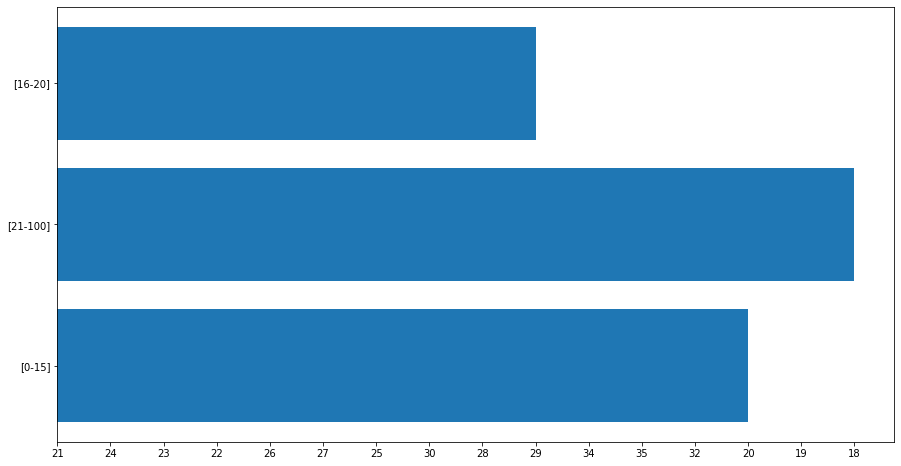

In [8]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh( data['d_attractive_important'], data['age'])

In [9]:
print(data.columns.values)

['has_null' 'wave' 'gender' 'age' 'age_o' 'd_age' 'd_d_age' 'race'
 'race_o' 'samerace' 'importance_same_race' 'importance_same_religion'
 'd_importance_same_race' 'd_importance_same_religion' 'field'
 'pref_o_attractive' 'pref_o_sincere' 'pref_o_intelligence' 'pref_o_funny'
 'pref_o_ambitious' 'pref_o_shared_interests' 'd_pref_o_attractive'
 'd_pref_o_sincere' 'd_pref_o_intelligence' 'd_pref_o_funny'
 'd_pref_o_ambitious' 'd_pref_o_shared_interests' 'attractive_o'
 'sinsere_o' 'intelligence_o' 'funny_o' 'ambitous_o' 'shared_interests_o'
 'd_attractive_o' 'd_sinsere_o' 'd_intelligence_o' 'd_funny_o'
 'd_ambitous_o' 'd_shared_interests_o' 'attractive_important'
 'sincere_important' 'intellicence_important' 'funny_important'
 'ambtition_important' 'shared_interests_important'
 'd_attractive_important' 'd_sincere_important' 'd_intellicence_important'
 'd_funny_important' 'd_ambtition_important'
 'd_shared_interests_important' 'attractive' 'sincere' 'intelligence'
 'funny' 'ambition' 'd_at

# Análise Exploratória 

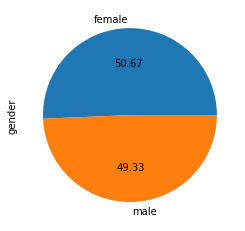

In [10]:
genero=data.gender.value_counts()
genero.plot(kind='pie', autopct="%.2f",legend=False)

count    1048.000000
mean       25.005725
std         3.270365
min        18.000000
25%        22.000000
50%        25.000000
75%        27.000000
max        35.000000
Name: age, dtype: float64

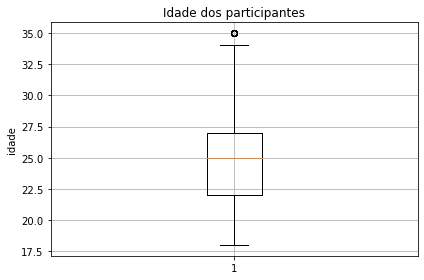

In [11]:
idade=data.age.astype(int)
plt.boxplot(idade)
plt.title('Idade dos participantes')
plt.ylabel('idade')
plt.grid(which='both')
plt.tight_layout()

idade.describe()

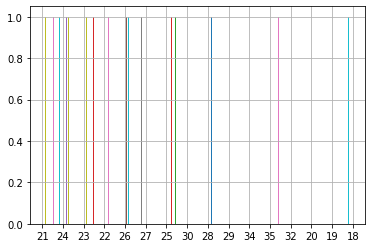

In [13]:
a=pd.crosstab(data.age,data.match)
data.age.hist()

<BarContainer object of 1048 artists>

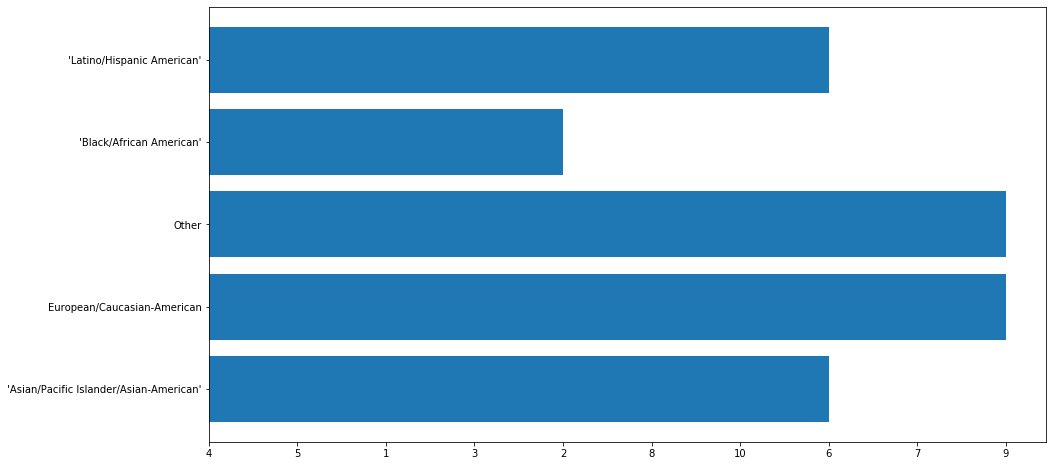

In [322]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh( data['race'], data['importance_same_religion'])

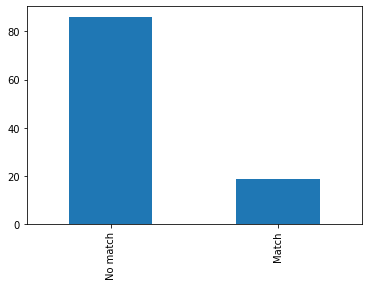

In [323]:
match = data.match.value_counts()
match_rate = match*0.1
match_rate = match_rate.rename(index={0: 'No match',1: 'Match'})

match_rate.plot.bar()

Text(0.5, 1.0, 'Porcentagem de Match por gênero')

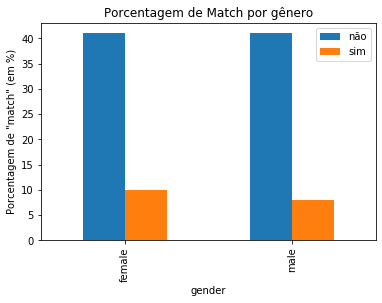

In [324]:
match=pd.crosstab(data.gender, data.match)
match = (match/match.sum().sum()*100).round(decimals=0)
match.plot(kind= "bar")
plt.ylabel('Porcentagem de "match" (em %)')
plt.legend(["não", "sim"])
plt.title("Porcentagem de Match por gênero")

In [325]:
match

match,0,1
gender,,
female,41.0,10.0
male,41.0,8.0


In [326]:
disse_sim = data[data['match'] == 1]
disse_nao  = data[data['match'] == 0]

/Users/beatrizrianhobernadinho/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


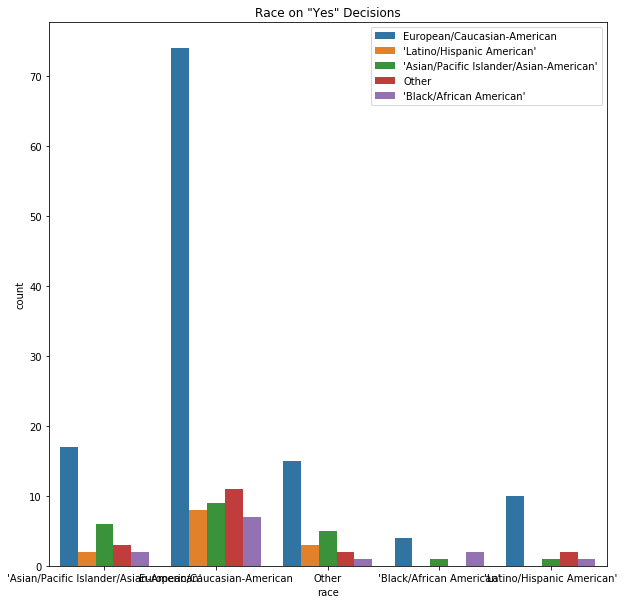

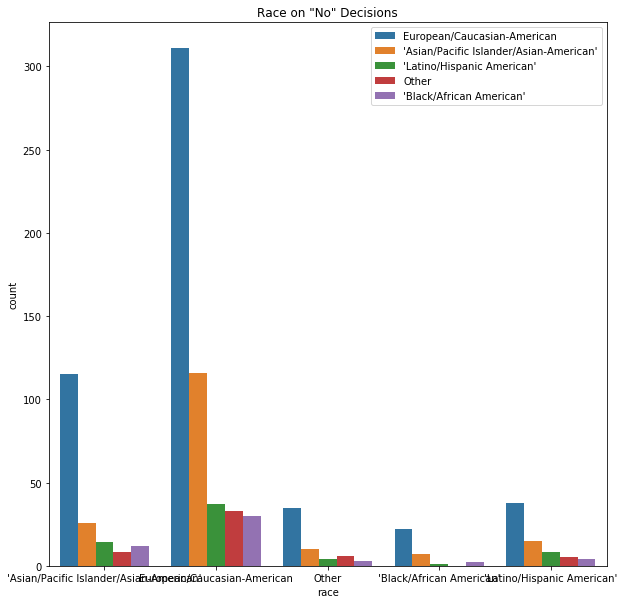

In [327]:
plt.figure(figsize=(10,10))
plt.title('Race on "Yes" Decisions')
sns.countplot(x='race', data=disse_sim, hue='race_o')
plt.legend(loc='upper right')

plt.subplot(111)
plt.figure(figsize=(10,10))
plt.title('Race on "No" Decisions')
sns.countplot(x='race', data=disse_nao, hue='race_o')
plt.legend(loc='upper right')


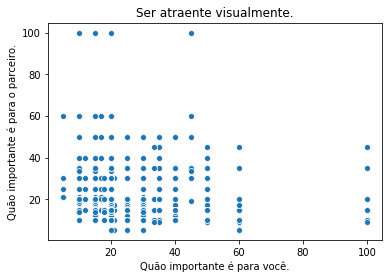

In [328]:
partnere_attractive = data.pref_o_attractive.astype(float)
you_attractive = data.attractive_important.astype(float)

sns.scatterplot(you_attractive,partnere_attractive)
plt.title('Ser atraente visualmente.')
plt.xlabel('Quão importante é para você.')
plt.ylabel('Quão importante é para o parceiro.')
plt.show()

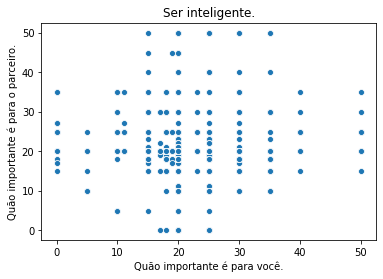

In [329]:
partnere_intelligence = data.pref_o_intelligence.astype(float)
you_intelligence = data.intellicence_important.astype(float)

sns.scatterplot(you_intelligence,partnere_intelligence)
plt.title('Ser inteligente.')
plt.xlabel('Quão importante é para você.')
plt.ylabel('Quão importante é para o parceiro.')
plt.show()

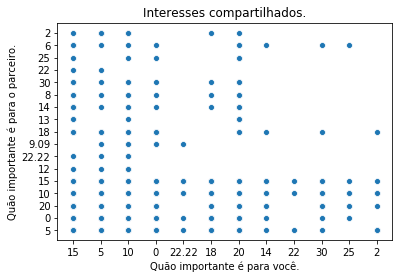

In [330]:
partnere_interes = data.pref_o_shared_interests
you_interes = data.shared_interests_important

sns.scatterplot(you_interes,partnere_interes)
plt.title('Interesses compartilhados.')
plt.xlabel('Quão importante é para você.')
plt.ylabel('Quão importante é para o parceiro.')
plt.show()

In [331]:
X_num = data[['age', "age_o", 'importance_same_race',
 'importance_same_religion',  'pref_o_attractive', 'pref_o_sincere',
 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious',
 'pref_o_shared_interests',  'attractive_o' ,'sinsere_o' ,'intelligence_o',
 'funny_o' ,'ambitous_o', 'shared_interests_o' ,'attractive_important', 'sincere_important' ,'intellicence_important' ,'funny_important',
 'ambtition_important' ,'shared_interests_important' ,'attractive', 'sincere',
 'intelligence' ,'funny' ,'ambition' ,'attractive_partner', 'sincere_partner',
 'intelligence_partner', 'funny_partner' ,'ambition_partner',
 'shared_interests_partner', 'sports', 'tvsports' ,'exercise', 'dining',
 'museums', 'art' ,'hiking' ,'gaming' ,'clubbing', 'reading', 'tv' ,'theater',
 'movies' ,'concerts', 'music' ,'shopping' ,'yoga', 
 'like'  
]]
X_cat = data[['gender', 'race', "race_o", 'field', 'met'  ]]

In [332]:
y = data['match']

In [333]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

X_cat_encoded = encoder.fit_transform(X_cat)

In [334]:
encoder.categories_

[array(['female', 'male'], dtype=object),
 array(["'Asian/Pacific Islander/Asian-American'",
        "'Black/African American'", "'Latino/Hispanic American'",
        'European/Caucasian-American', 'Other'], dtype=object),
 array(["'Asian/Pacific Islander/Asian-American'",
        "'Black/African American'", "'Latino/Hispanic American'",
        'European/Caucasian-American', 'Other'], dtype=object),
 array(["'Applied Maths/Econs'", "'Art History/medicine'",
        "'Biomedical Engineering'", "'Business & International Affairs'",
        "'Business [MBA]'", "'Business- MBA'", "'Computer Science'",
        "'Economics and Political Science'", "'Economics; Sociology'",
        "'Educational Psychology'", "'Electrical Engineering'",
        "'Elementary/Childhood Education [MA]'", "'German Literature'",
        "'International Educational Development'",
        "'Masters in Public Administration'", "'Masters of Social Work'",
        "'Mathematical Finance'", "'Mechanical Engineering'",


In [335]:
X_cat_encoded.toarray()[0]

array([1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0.])

In [336]:
X_num_array = X_num.values

In [337]:
X_cat_encoded_array = X_cat_encoded.toarray()

In [338]:
X = np.concatenate((X_num_array, X_cat_encoded_array), axis=1)

In [339]:
X[0]

array(['21', '27', '2', '4', '35', '20', '20', '20', '0', '5', '6', '8',
       '8', '8', '8', '6', '15', '20', '20', '15', '15', '15', '6', '8',
       '8', '8', '7', '6', '9', '7', '7', '6', '5', '9', '2', '8', '9',
       '1', '1', '5', '1', '5', '6', '9', '1', '10', '10', '9', '8', '1',
       '7', 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], dtype=object)

In [340]:
y[0]

0

In [341]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.8473282442748091


/Users/beatrizrianhobernadinho/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [342]:
novo_dado = ["female", 18, 18,'Latino/Hispanic American', 'Latino/Hispanic American','Engineering', 80, 100, 80, 60, 70, 100, 100, 100, 100, 100, 100, 60, 100, 70, 70, 70, 80, 6, 8, 7, 5, 7, 8, 9, 7.5, 9, 8, 6, 0, 8, 10, 5, 7, 0, 7, 0, 6, 10, 6, 10, 8, 10, 8, 3, 10, 1]  
novo_x_num = np.array([novo_dado[0]]).reshape(-1,1)
novo_x_cat = [novo_dado[1:]]

In [343]:
novo_x_num

array([['female']], dtype='<U6')

In [344]:
novo_x_cat

[[18,
  18,
  'Latino/Hispanic American',
  'Latino/Hispanic American',
  'Engineering',
  80,
  100,
  80,
  60,
  70,
  100,
  100,
  100,
  100,
  100,
  100,
  60,
  100,
  70,
  70,
  70,
  80,
  6,
  8,
  7,
  5,
  7,
  8,
  9,
  7.5,
  9,
  8,
  6,
  0,
  8,
  10,
  5,
  7,
  0,
  7,
  0,
  6,
  10,
  6,
  10,
  8,
  10,
  8,
  3,
  10,
  1]]

In [345]:
data_suja_completa.attractive.value_counts()

7     2816
8     2173
6     1100
9      707
5      642
10     246
4      238
3      145
?      105
7       98
8       44
10      22
9       22
2       20
Name: attractive, dtype: int64